In [13]:
import pandas as pd

import scienceplots  # noqa: F401
import seaborn as sns
import matplotlib.pyplot as plt

from utils import load_data


plt.style.use(["science", "nature"])
plt.rcParams.update(
    {
        "font.size": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "axes.labelsize": 12,
        "legend.fontsize": 12,
    }
)

date = "2024-05-10"
fixed_station = "calg"

In [14]:
df = load_data(f"./data/ForbushDecrease/{date}/all.txt")
df

,datetime,MXCO,NANM,CALM,ROME,AATB,BKSN,JUNG,JUNG1,LMKS,...,NAIN,PWNK,THUL,MWSB,MWSN,SOPB,SOPO,DOMB,DOMC,TERA
0,2024-05-10 00:00:00,220.867,254.313,74.050,117.433,1261.4,115.692,150.704,323.198,425.173,...,194.40,198.77,111.50,25.34,230.36,127.79,269.93,4.393,16.190,111.216
1,2024-05-10 00:01:00,225.217,253.632,69.950,NaN,1256.3,117.483,150.784,319.041,411.394,...,195.29,197.01,114.61,25.91,228.55,128.19,274.75,5.117,15.615,109.428
2,2024-05-10 00:02:00,216.833,249.994,70.450,119.500,1270.2,117.455,149.123,317.795,425.233,...,195.59,200.01,113.53,26.73,230.34,127.22,267.29,4.521,18.197,105.852
3,2024-05-10 00:03:00,223.100,254.035,68.833,119.067,1274.4,115.861,148.927,318.894,419.176,...,199.30,196.23,114.86,26.71,226.73,129.70,264.30,4.647,16.529,105.852
4,2024-05-10 00:04:00,222.600,256.309,71.933,118.950,1290.2,115.859,151.099,323.218,432.783,...,195.43,197.71,112.79,24.59,230.41,128.26,268.65,4.774,16.150,105.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2024-05-11 23:55:00,209.883,240.845,67.400,113.783,1190.1,106.850,135.989,303.621,388.554,...,180.31,184.87,102.85,23.99,202.39,114.58,235.12,3.606,14.517,98.849
2876,2024-05-11 23:56:00,206.000,238.533,62.683,113.950,1195.4,104.821,136.718,291.756,380.691,...,177.40,188.42,105.40,22.52,200.44,113.06,239.30,4.103,15.260,99.555
2877,2024-05-11 23:57:00,207.000,241.676,65.433,112.150,1191.7,112.149,138.436,298.758,383.642,...,177.64,183.20,102.60,23.50,201.93,113.84,236.07,4.194,15.231,98.849
2878,2024-05-11 23:58:00,206.950,235.648,66.317,111.983,1195.2,111.054,138.698,299.233,382.862,...,176.84,185.32,103.19,23.50,200.23,110.25,236.51,3.717,15.538,94.966


## Plotting

In [15]:
# Count amount of nan data
nans_count = dict(
    filter(
        lambda x: x[1] > 0, df.drop(columns="datetime").isna().sum().to_dict().items()
    )
)

display(nans_count, len(df))

{'ROME': 4,
 'AATB': 6,
 'IRK2': 2727,
 'IRK3': 1,
 'DRBS': 2,
 'FSMT': 19,
 'INVK': 3,
 'JBGO': 1511}

2880

In [16]:
total = len(df)
threshold = 0.5

# Drop columns (stations) that superates a nan ratio threshold
stations = list(
    df.drop(
        columns=list(
            filter(lambda station: nans_count[station] / total >= threshold, nans_count)
        )
    ).columns[1:]
)

data = {"datetime": [], "station": [], "value": []}
for _, row in df.iterrows():
    for station in stations:
        data["datetime"].append(row["datetime"])
        data["station"].append(station)
        data["value"].append(row[station])

df_plot = pd.DataFrame(data)
df_plot

,datetime,station,value
0,2024-05-10 00:00:00,MXCO,220.867
1,2024-05-10 00:00:00,NANM,254.313
2,2024-05-10 00:00:00,CALM,74.050
3,2024-05-10 00:00:00,ROME,117.433
4,2024-05-10 00:00:00,AATB,1261.400
...,...,...,...
89275,2024-05-11 23:59:00,SOPB,112.200
89276,2024-05-11 23:59:00,SOPO,237.240
89277,2024-05-11 23:59:00,DOMB,3.900
89278,2024-05-11 23:59:00,DOMC,14.844


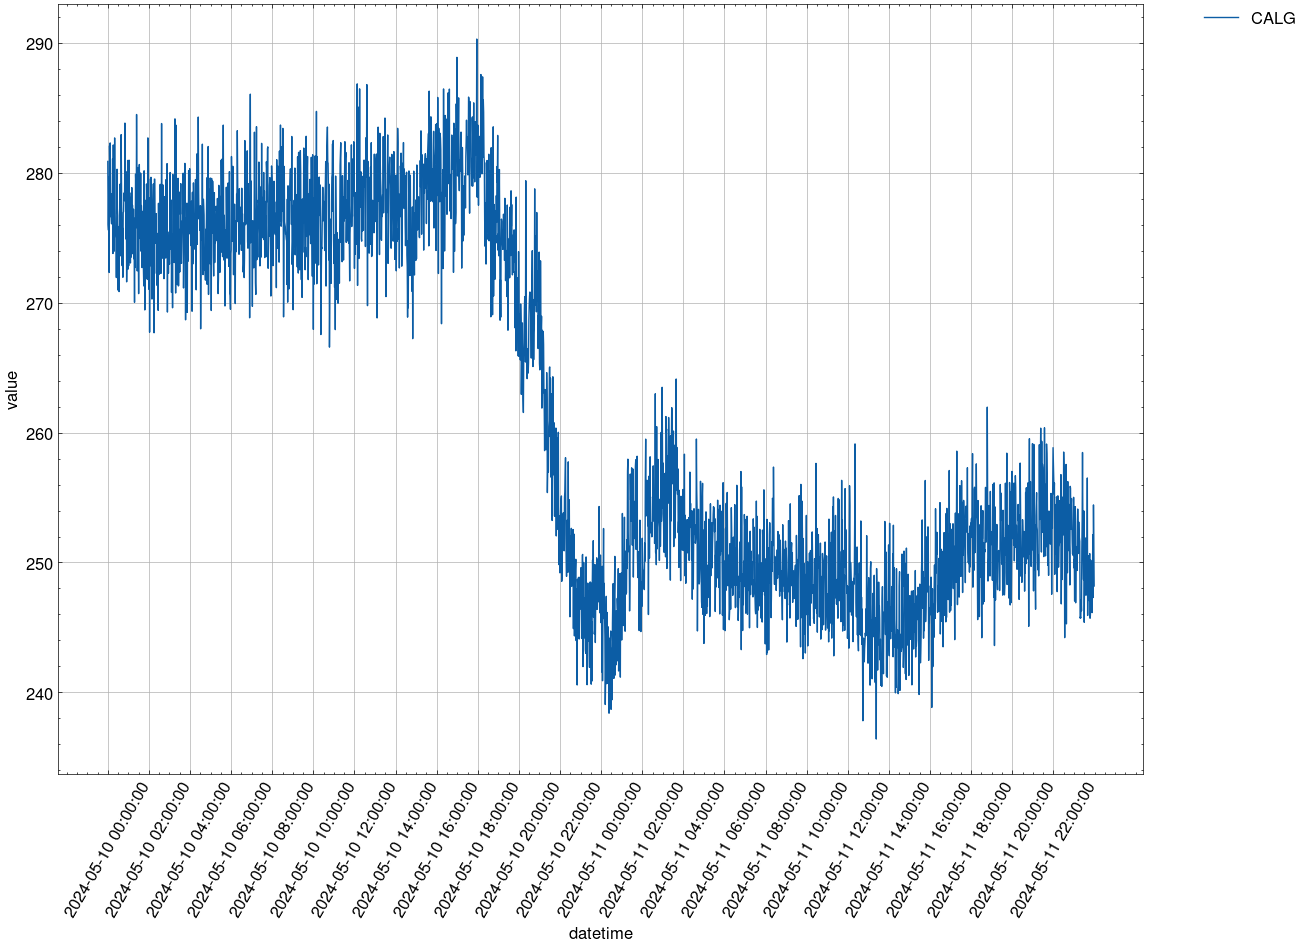

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

# We can plot all stations at once, but this one it's special,
# it's so clear the Forbush Decrease
sns.lineplot(
    data=df_plot[df_plot["station"] == fixed_station.upper()],
    x="datetime",
    y="value",
    hue="station",
    ax=ax,
)

date_range = pd.date_range(
    start=df_plot["datetime"].min(),
    end=df_plot["datetime"].max(),
    freq="2h",
).to_list()

ax.set_xticks(
    ticks=date_range,
    labels=list(map(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"), date_range)),
    rotation=60,
)

ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.savefig(
    f"./figures/ForbushDecrease/{date}/{fixed_station.lower()}_plot.pdf",
    bbox_inches="tight",
)
plt.show()